<a href="https://colab.research.google.com/github/OVP2023/ML/blob/main/%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B4%D0%B7_min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Исследуйте оставленные признаки на выбросы.
a. Удалите выбросы в случае обнаружения.
b. Повторите п. 3, п. 4 на измененных данных.
Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.
Сформулируйте выводы по проделанной работе.
a. Кратко опишите какие преобразования были сделаны с данными.
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.

In [71]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.datasets import fetch_california_housing

In [72]:
#Получите данные и загрузите их в рабочую среду
housing = fetch_california_housing()

In [121]:
#Исходные признаки
X=pd.DataFrame(housing.data)
X.rename(columns={0:'MedInc_средний_доход',1:'HouseAge_средний_возраст_дома ',2:'AveRooms_среднее_количество_комнат',3:'AveBedrms_среднее_количество_спален' ,4:'Population_население',5:'AveOccup_среднее_количество_жильцов',6:'Latitude_широта',7:'Longitude_долгота'}, inplace=True)
XXL=X  #копия дата сэта для модели 2
XXXL=X #копия дата сэта для модели 3
XXXL['Target']=pd.DataFrame(housing.target)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MedInc_средний_доход                 20640 non-null  float64
 1   HouseAge_средний_возраст_дома        20640 non-null  float64
 2   AveRooms_среднее_количество_комнат   20640 non-null  float64
 3   AveBedrms_среднее_количество_спален  20640 non-null  float64
 4   Population_население                 20640 non-null  float64
 5   AveOccup_среднее_количество_жильцов  20640 non-null  float64
 6   Latitude_широта                      20640 non-null  float64
 7   Longitude_долгота                    20640 non-null  float64
 8   Target                               20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
X.head()

,MedInc_средний_доход,HouseAge_средний_возраст_дома,AveRooms_среднее_количество_комнат,AveBedrms_среднее_количество_спален,Population_население,AveOccup_среднее_количество_жильцов,Latitude_широта,Longitude_долгота
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
#целевая переменная - медианная стоимость дома, в сотнях тыс. дол.
y=pd.DataFrame(housing.target)
y.rename(columns={0:'Price,K$'},inplace=True)
y.head()

,"Price,K$"
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [6]:
#модель 1 на основе всех неизмененных признаков
model1 = LinearRegression()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model1.fit(X_train, y_train)

LinearRegression()

In [7]:
#Оценка модели 1(метрики RMSE, R2)
y_pred1 = model1.predict(X_train)
r2_model1_train=metrics.r2_score(y_train, y_pred1)
rmse_model1_train=np.sqrt(metrics.mean_squared_error(y_train, y_pred1))

y_pred2 = model1.predict(X_test)
r2_model1_test=metrics.r2_score(y_test, y_pred2)
rmse_model1_test=np.sqrt(metrics.mean_squared_error(y_test, y_pred2))

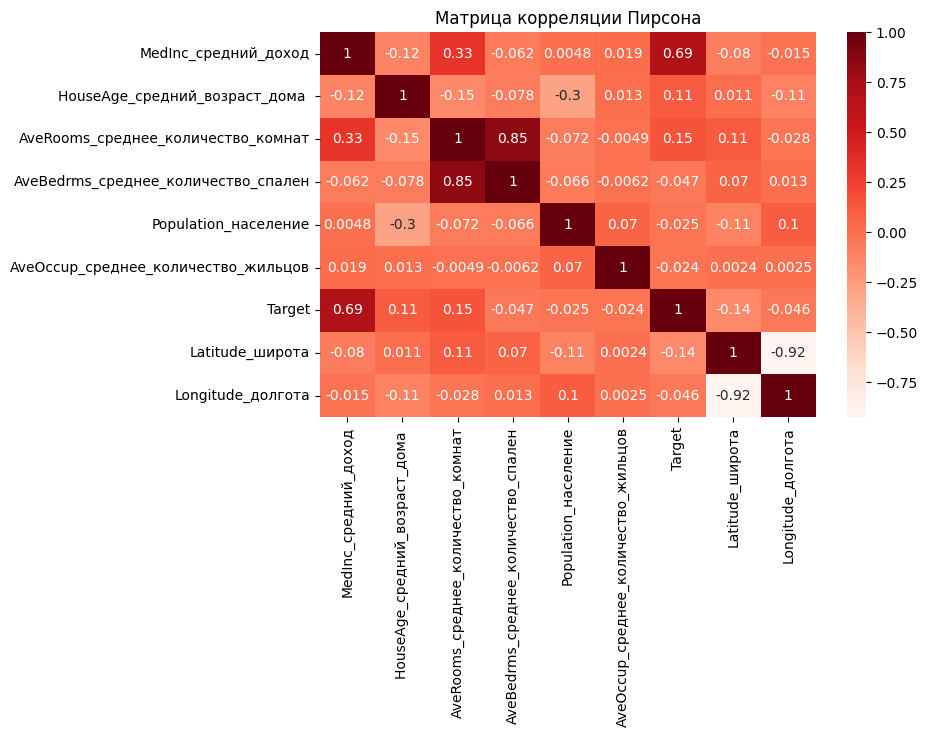

In [8]:
#Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
#Выводы: C целевой переменной в столбце 'Target' коррелируют признаки 'MedInc_средний_доход','HouseAge_средний_возраст_дома ','AveRooms_среднее_количество_комнат',
#Кроме этого видна хорошая положительная коррреляция между 'AveRooms_среднее_количество_комнат' и 'AveBedrms_среднее_количество_спален'. От оставшегося признака
#'AveOccup_среднее_количество_жильцов' можно избавится (геоданные в признаках 'Latitude_широта','Longitude_долгота' должны обрабатываться отдельно)
X_mat=X
X_mat['Target']=y
corr_matrix_pearson = X_mat[['MedInc_средний_доход','HouseAge_средний_возраст_дома ','AveRooms_среднее_количество_комнат','AveBedrms_среднее_количество_спален' ,'Population_население','AveOccup_среднее_количество_жильцов','Target','Latitude_широта','Longitude_долгота']].corr()
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Reds')
plt.title("Матрица корреляции Пирсона")
plt.show()

In [9]:
X_mat.head()

,MedInc_средний_доход,HouseAge_средний_возраст_дома,AveRooms_среднее_количество_комнат,AveBedrms_среднее_количество_спален,Population_население,AveOccup_среднее_количество_жильцов,Latitude_широта,Longitude_долгота,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
#модель 2 на основе признаков, отобранных по значениям корреляций
X2 = X_mat.drop(columns=['Target','AveOccup_среднее_количество_жильцов'])

model2 =  LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)
model2.fit(X_train, y_train)


LinearRegression()

In [11]:
X2.head()

,MedInc_средний_доход,HouseAge_средний_возраст_дома,AveRooms_среднее_количество_комнат,AveBedrms_среднее_количество_спален,Population_население,Latitude_широта,Longitude_долгота
0,8.3252,41.0,6.984127,1.023810,322.0,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,37.85,-122.25


In [12]:
#Оценка модели 2 (метрики RMSE, R2)

y_pred3 = model2.predict(X_train)
r2_model2_train=metrics.r2_score(y_train, y_pred3)
rmse_model2_train=np.sqrt(metrics.mean_squared_error(y_train, y_pred3))
y_pred4 = model2.predict(X_test)
r2_model2_test=metrics.r2_score(y_test, y_pred4)
rmse_model2_test=np.sqrt(metrics.mean_squared_error(y_test, y_pred4))


In [13]:
#Исследуйте оставленные признаки на выбросы
X.describe()

,MedInc_средний_доход,HouseAge_средний_возраст_дома,AveRooms_среднее_количество_комнат,AveBedrms_среднее_количество_спален,Population_население,AveOccup_среднее_количество_жильцов,Latitude_широта,Longitude_долгота,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


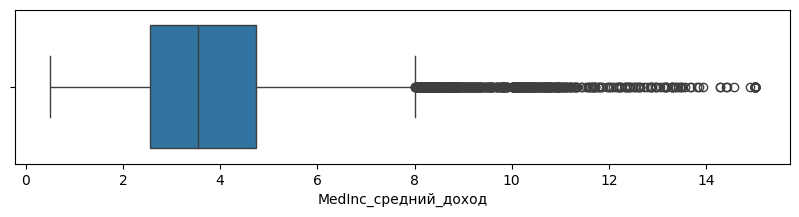

In [100]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=X['MedInc_средний_доход'])
plt.show()


In [97]:
#Получаем верхнюю и нижнюю устанавливаемых границ в квантилях
lower_bound = X['MedInc_средний_доход'].quantile(q=0.01)
upper_bound = X['MedInc_средний_доход'].quantile(q=0.99)
print(lower_bound,upper_bound)
#ограничимся 11K

1.069631 10.596540000000003


<Axes: ylabel='Frequency'>

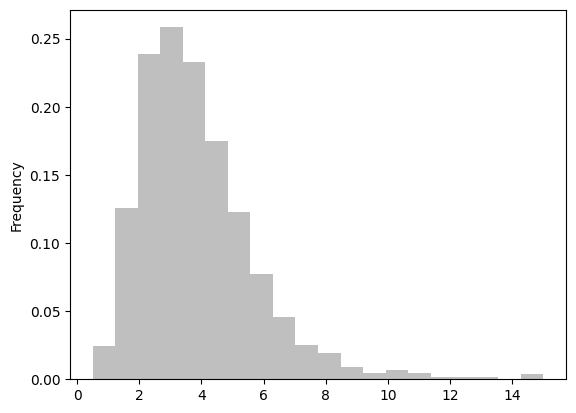

In [15]:
X['MedInc_средний_доход'].plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='grey')

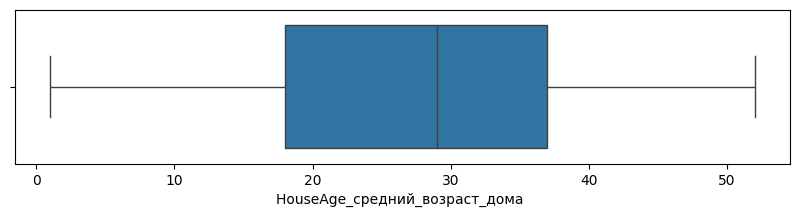

In [99]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=X['HouseAge_средний_возраст_дома '])
plt.show()
#нет выбросов

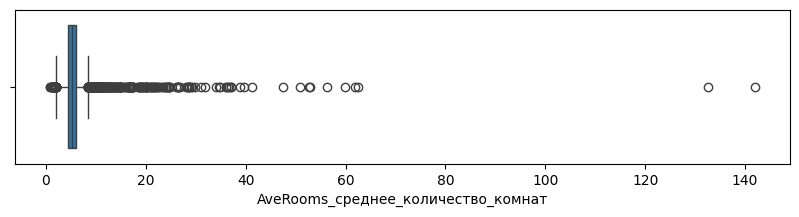

In [101]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=X['AveRooms_среднее_количество_комнат'])
plt.show()

In [102]:
#Получаем верхнюю и нижнюю устанавливаемых границ и выводим не входящие в диапазон
lower_bound = X['AveRooms_среднее_количество_комнат'].quantile(q=0.005)
upper_bound = X['AveRooms_среднее_количество_комнат'].quantile(q=0.995)
print(lower_bound,upper_bound)
#ограничимся 16 комнатами

2.3237973419854 15.754931806259924


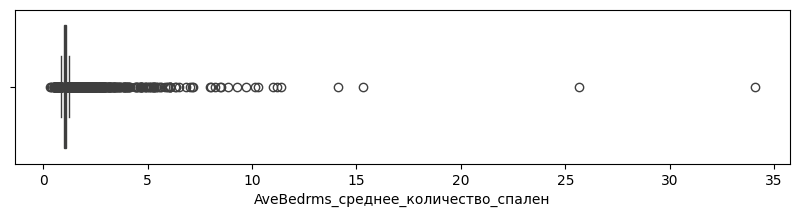

In [103]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=X['AveBedrms_среднее_количество_спален'])
plt.show()

In [104]:
#Получаем верхнюю и нижнюю устанавливаемых границ
lower_bound = X['AveBedrms_среднее_количество_спален'].quantile(q=0.005)
upper_bound = X['AveBedrms_среднее_количество_спален'].quantile(q=0.995)
print(lower_bound,upper_bound)
#ограничимся 4

0.831037411971831 3.112918261538778


In [122]:
#Удаляем выбросы

XXXL=XXXL[XXXL['AveRooms_среднее_количество_комнат']<=16]
XXXL=XXXL[XXXL['AveBedrms_среднее_количество_спален']<=4]
XXXL=XXXL[XXXL['MedInc_средний_доход']<=11]

XXXL.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20380 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MedInc_средний_доход                 20380 non-null  float64
 1   HouseAge_средний_возраст_дома        20380 non-null  float64
 2   AveRooms_среднее_количество_комнат   20380 non-null  float64
 3   AveBedrms_среднее_количество_спален  20380 non-null  float64
 4   Population_население                 20380 non-null  float64
 5   AveOccup_среднее_количество_жильцов  20380 non-null  float64
 6   Latitude_широта                      20380 non-null  float64
 7   Longitude_долгота                    20380 non-null  float64
 8   Target                               20380 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [123]:
#модель 3 на основе признаков  после удаления выбросов и нового логарифмического признака
#XXL['log_MedInc']=X['MedInc_средний_доход']
model3 =  LinearRegression()
y=XXXL['Target']
XXXL=XXXL.drop(columns=['Target'])
X_train, X_test, y_train, y_test = train_test_split(XXXL, y, test_size=0.2, random_state=0)
model3.fit(X_train, y_train)

LinearRegression()

In [124]:
#Оценка модели 3(метрики RMSE, R2)
y_pred5 = model3.predict(X_train)
r2_model3_train=metrics.r2_score(y_train, y_pred5)
rmse_model3_train=np.sqrt(metrics.mean_squared_error(y_train, y_pred5))

y_pred6 = model3.predict(X_test)
r2_model3_test=metrics.r2_score(y_test, y_pred6)
rmse_model3_test=np.sqrt(metrics.mean_squared_error(y_test, y_pred6))

In [125]:
dftab=pd.DataFrame()
dftab['Модель']=['Модель 1','Модель 2','Модель 3']
dftab['R2 test']=[r2_model1_test,r2_model2_test,r2_model3_test]
dftab['RMSE test']=[rmse_model1_test,rmse_model2_test,rmse_model3_test]
dftab['R2 train']=[r2_model1_test,r2_model2_test,r2_model3_test]
dftab['RMSE train']=[rmse_model1_test,rmse_model2_test,rmse_model3_test]
dftab.head(3)

,Модель,R2 test,RMSE test,R2 train,RMSE train
0,Модель 1,0.594323,0.727313,0.594323,0.727313
1,Модель 2,0.591758,0.729609,0.591758,0.729609
2,Модель 3,0.622447,0.699105,0.622447,0.699105


Вывод: Как видно из таблицы "Сравнение моделей на тестовых наборах"  лучшей результат показала модель 3 (самая маленькая средняя ошибка прогнозирования модели RMSE и самый приближенный к 1 коэффициент детерминации R2, показывающий эффективность модели). Качество модели 2 практически не ухудшилось по сравнению с моделью 1, но удалось избавится от лишнего признака 'AveOccup_среднее_количество_жильцов'